<a href="https://colab.research.google.com/github/biancapinto1/Intro-to-data-science-w-Python---final/blob/main/final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To make a table of our data sources
from prettytable import PrettyTable
# specify the Column Names while initialising the Table
table = PrettyTable(["Nr","English title of the dataset","French title","Scope (School-level, Departmental, Regional…)","Variables / Content","Timeframe","Institution / Website / Source","URL"], break_on_hyphens=True)
# add row
table.add_row(["1","Number of pupils and classes per primary school in France","Effectifs d’élèves par école","School-level","Number of pupils by school, by level; number of classes; UEEA/ULIS counts (from 2024)", "2009–2024 (observations each October)","","https://www.data.gouv.fr/datasets/effectifs-deleves-par-niveau-et-nombre-de-classes-par-ecole-date-dobservation-au-debut-du-mois-doctobre-chaque-annee/"])
table.add_row([    "2","National evaluation results at start of 6ᵉ by department (consolidated)",    "Résultats consolidés aux évaluations nationales de début de sixième par département",    "Departmental",    "Average scores in French and Mathematics at start of 6ᵉ; group-level performance distributions",    "Latest update 2025 (annual evaluations each September)",    "DEPP – Ministère de l’éducation nationale",    "https://www.data.gouv.fr/datasets/resultats-consolides-aux-evaluations-nationales-de-debut-de-sixieme-par-departement"])
table.add_row([    "3","Population per department (2022)",    "Nombre d’habitants par département (2022)",    "Departmental",    "Population per departement",    "2022",    "INSEE",    "https://www.insee.fr/fr/statistiques/8290631?sommaire=8290669"])
table.add_row([    "4","GDP per inhabitant by department (2022)",    "Produit intérieur brut par habitant par département",    "Departmental",    "GDP per inhabitant (economic output per capita) by department in 2022",    "2022",    "INSEE",    "https://statistiques-locales.insee.fr/#c=indicator&view=map2 (select: PIB/habitant par département 2022)"])
print(table)

+----+-------------------------------------------------------------------------+-------------------------------------------------------------------------------------+-----------------------------------------------+------------------------------------------------------------------------------------------------+--------------------------------------------------------+-------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+
| Nr |                       English title of the dataset                      |                                     French title                                    | Scope (School-level, Departmental, Regional…) |                                      Variables / Content                                       |                       Timeframe                        |       Institution / Website / Source      |                     

#Importing libraries for data analysis

In [ ]:
#Enabling Google Drive imports
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing all the libraries at once which are needed for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.ticker as mticker
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

## Data Importing: Importing all necessary datasets into Google Colab

In [ ]:
#Importing all datasets at once

#Importing dataset on pupils' numbers and class size - source: https://www.data.gouv.fr/datasets/effectifs-deleves-par-niveau-et-nombre-de-classes-par-ecole-date-dobservation-au-debut-du-mois-doctobre-chaque-annee
df_nrofstudents = pd.read_csv('/content/drive/MyDrive/Picone Pinto Terres - data analysis with python/students.csv', sep=';', encoding='utf-8')

#Importing dataset on performance in Math and French - source: https://www.data.gouv.fr/datasets/resultats-consolides-aux-evaluations-nationales-de-debut-de-sixieme-par-departement/
df_performance = pd.read_csv('/content/drive/MyDrive/Picone Pinto Terres - data analysis with python/performance.csv', sep=';', encoding='utf-8')

#Importing dataset on GDP per capita in the departments
df_GDPpercapita_per_department = pd.read_csv('/content/drive/MyDrive/Picone Pinto Terres - data analysis with python/GDP.csv', sep=';', encoding = 'utf-8')
#Importing dataset on population size
df_population_per_department = pd.read_csv('/content/drive/MyDrive/Picone Pinto Terres - data analysis with python/population.csv', sep=";", encoding="utf-8")

/tmp/ipython-input-1785905816.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nrofstudents = pd.read_csv('/content/drive/MyDrive/Picone Pinto Terres - data analysis with python/students.csv', sep=';', encoding='utf-8')


In [ ]:
#renaming a column for more clarity
df_GDPpercapita_per_department.rename(columns={'N°':'Code'}, inplace=True)

In [ ]:
df_GDPpercapita_per_department.rename(columns={'Département':'Libellé'}, inplace=True)

#Data labeling: Overview of the names of our datasets used in the following steps

## Data Cleaning: Preparing our four datasets for the analysis

Displaying our datasets

In [ ]:
df_nrofstudents.head()

,Rentrée scolaire,Code région académique,Code région Insee,Région académique,Code académie,Académie,Code département,Département,Code Postal,Commune,...,Nombre d'élèves en pré-élémentaire hors ULIS,Nombre d'élèves en élémentaire hors ULIS,Nombre d'élèves en ULIS,Nombre d'élèves en UEEA,Nombre d'élèves en CP hors ULIS,Nombre d'élèves en CE1 hors ULIS,Nombre d'élèves en CE2 hors ULIS,Nombre d'élèves en CM1 hors ULIS,Nombre d'élèves en CM2 hors ULIS,num_ligne
0,2015,4,24,CENTRE-VAL DE LOIRE,18,ORLEANS-TOURS,36,INDRE,36300,LE BLANC,...,118,0,0,0,0.0,0.0,0.0,0.0,0.0,330025
1,2015,4,24,CENTRE-VAL DE LOIRE,18,ORLEANS-TOURS,36,INDRE,36200,LE MENOUX,...,0,20,0,0,0.0,0.0,10.0,10.0,0.0,330028
2,2015,4,24,CENTRE-VAL DE LOIRE,18,ORLEANS-TOURS,36,INDRE,36200,LE PECHEREAU,...,0,113,0,0,30.0,22.0,17.0,15.0,29.0,330029
3,2015,4,24,CENTRE-VAL DE LOIRE,18,ORLEANS-TOURS,36,INDRE,36160,SAINTE-SEVERE-SUR-INDRE,...,18,47,0,0,10.0,10.0,12.0,10.0,5.0,330093
4,2015,4,24,CENTRE-VAL DE LOIRE,18,ORLEANS-TOURS,37,INDRE-ET-LOIRE,37340,AVRILLE-LES-PONCEAUX,...,62,21,0,0,21.0,0.0,0.0,0.0,0.0,330155


In [ ]:
df_performance.head()

,num_ligne,annee,Code région académique,Libellé région académique,Code académie,Libellé académie,Code département,departement,discipline,ips_moyen,caracteristiques,score_moyen,ecart_type,groupe_1,groupe_2,groupe_3,groupe_4,groupe_5,groupe_6
0,15.0,2017,1.0,AUVERGNE-RHONE-ALPES,6.0,CLERMONT-FERRAND,03,ALLIER,Français,98.7,Garçon,240.9,47.8,17.0,20.9,24.3,16.4,10.6,10.9
1,45.0,2017,6.0,GRAND EST,19.0,REIMS,08,ARDENNES,Français,92.8,Garçon,238.4,49.5,16.7,24.2,22.2,16.2,11.0,9.7
2,85.0,2017,1.0,AUVERGNE-RHONE-ALPES,6.0,CLERMONT-FERRAND,15,CANTAL,Français,105.0,Ensemble,254.7,47.1,9.9,17.8,21.0,20.0,14.4,16.9
3,96.0,2017,15.0,NOUVELLE-AQUITAINE,13.0,POITIERS,16,CHARENTE,Mathématiques,100.7,Garçon,251.0,50.4,11.4,16.8,21.6,21.1,14.4,14.7
4,104.0,2017,4.0,CENTRE-VAL DE LOIRE,18.0,ORLEANS-TOURS,18,CHER,Français,99.1,Fille,255.3,46.7,9.1,17.5,22.0,19.7,14.4,17.3


In [ ]:
df_GDPpercapita_per_department.head()

,Code,Libellé,GDP per capita
0,01,Ain,28296
1,02,Aisne,25556
2,03,Allier,27657
3,04,Alpes de Haute-Provence,28149
4,05,Hautes-Alpes,28672


In [ ]:
df_population_per_department.head()

,Code,Libellé,Population
0,01,Ain,671 289
1,02,Aisne,525 558
2,03,Allier,334 715
3,04,Alpes-de-Haute-Provence,167 179
4,05,Hautes-Alpes,141 677


In [ ]:
df_population_per_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        101 non-null    object
 1   Libellé     101 non-null    object
 2   Population  101 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


### Data cleaning
Removing missing values

In [ ]:
#Creating a subset of nr_ofstudents only for rentrée scolaire 2023
df_nrofstudents2023 = df_nrofstudents[df_nrofstudents['Rentrée scolaire'] == 2023].copy()

# Group by department, sum the total students and total classes, and then calculate the department-level ratio
df_nrofstudents2023byDPT = df_nrofstudents2023.groupby(['Code département', 'Département']).agg(
    total_nombre_eleves=('Nombre total d\'élèves', 'sum'),
    total_nombre_classes=('Nombre total de classes', 'sum')
).reset_index()

# Calculate the pupils per class at the department level using the aggregated totals
df_nrofstudents2023byDPT['Pupils per class (Department Level)'] = df_nrofstudents2023byDPT['total_nombre_eleves'] / df_nrofstudents2023byDPT['total_nombre_classes']

display(df_nrofstudents2023byDPT.head())

,Code département,Département,total_nombre_eleves,total_nombre_classes,Pupils per class (Department Level)
0,01,AIN,68829,2952,23.316057
1,02,AISNE,48704,2487,19.583434
2,03,ALLIER,25391,1302,19.501536
3,04,ALPES-DE-HTE-PROVENCE,13768,692,19.895954
4,05,HAUTES-ALPES,11327,580,19.529310


In [ ]:
df_nrofstudents2023byDPT.isnull().sum()

,0
Code département,0
Département,0
total_nombre_eleves,0
total_nombre_classes,0
Pupils per class (Department Level),0


In [ ]:
#data cleaning for performance data
df_performance.isnull().sum()

,0
num_ligne,0
annee,0
Code région académique,48
Libellé région académique,48
Code académie,48
Libellé académie,48
Code département,48
departement,0
discipline,0
ips_moyen,0


In [ ]:
df_performance_clean=df_performance.dropna()
df_performance_clean.isnull().sum()

,0
num_ligne,0
annee,0
Code région académique,0
Libellé région académique,0
Code académie,0
Libellé académie,0
Code département,0
departement,0
discipline,0
ips_moyen,0


In [ ]:
#data cleaning for GDP data
df_GDPpercapita_per_department.isnull().sum()

,0
Code,0
Libellé,0
GDP per capita,0


In [ ]:
# Select only the relevant columns first
df_GDPpercapita_per_department_clean = df_GDPpercapita_per_department[['Code', 'Libellé', 'GDP per capita']].copy()

# Now drop rows where 'GDP per capita' is NaN
df_GDPpercapita_per_department_clean.dropna(subset=['GDP per capita'], inplace=True)

# Verify the cleaning by checking for null values again
print("Null values after targeted cleaning:")
print(df_GDPpercapita_per_department_clean.isnull().sum())

# Display head to confirm data
print("\nCleaned DataFrame head:")
display(df_GDPpercapita_per_department_clean.head())

Null values after targeted cleaning:
Code              0
Libellé           0
GDP per capita    0
dtype: int64

Cleaned DataFrame head:


,Code,Libellé,GDP per capita
0,01,Ain,28296
1,02,Aisne,25556
2,03,Allier,27657
3,04,Alpes de Haute-Provence,28149
4,05,Hautes-Alpes,28672


In [ ]:
#data cleaning for population data
df_population_per_department.isnull().sum()

,0
Code,0
Libellé,0
Population,0


## Checking whether data types are correct

In [ ]:
df_nrofstudents2023byDPT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Code département                     101 non-null    object 
 1   Département                          101 non-null    object 
 2   total_nombre_eleves                  101 non-null    int64  
 3   total_nombre_classes                 101 non-null    int64  
 4   Pupils per class (Department Level)  101 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.1+ KB


In [ ]:
df_performance_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4848 entries, 0 to 4895
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_ligne                  4848 non-null   float64
 1   annee                      4848 non-null   int64  
 2   Code région académique     4848 non-null   float64
 3   Libellé région académique  4848 non-null   object 
 4   Code académie              4848 non-null   float64
 5   Libellé académie           4848 non-null   object 
 6   Code département           4848 non-null   object 
 7   departement                4848 non-null   object 
 8   discipline                 4848 non-null   object 
 9   ips_moyen                  4848 non-null   float64
 10  caracteristiques           4848 non-null   object 
 11  score_moyen                4848 non-null   float64
 12  ecart_type                 4848 non-null   float64
 13  groupe_1                   4848 non-null   float64
 1

In [ ]:
df_GDPpercapita_per_department_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Code            96 non-null     object
 1   Libellé         96 non-null     object
 2   GDP per capita  96 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [ ]:
df_population_per_department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        101 non-null    object
 1   Libellé     101 non-null    object
 2   Population  101 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
#Change the data type of population: remove the blanks
df_population_per_department['Population'] = df_population_per_department['Population'].str.replace(' ', '')

In [ ]:
#checking whether the code worked
df_population_per_department.head()

,Code,Libellé,Population
0,01,Ain,671289
1,02,Aisne,525558
2,03,Allier,334715
3,04,Alpes-de-Haute-Provence,167179
4,05,Hautes-Alpes,141677


In [ ]:
df_population_per_department['Population'] = pd.to_numeric(df_population_per_department['Population'], errors='coerce')
df_population_per_department.info()
#Data type now successfully converted to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        101 non-null    object
 1   Libellé     101 non-null    object
 2   Population  101 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


#Creating one dataset which contains all relevant variables with no missing values

In [ ]:
# Making a subset where we only keep Math performance, for the year 2024 and for all pupils
df_2024 = df_performance_clean[df_performance_clean['annee'] == 2024]
df_2024_math = df_2024[df_2024['discipline'] == 'Mathématiques']
df_2024_math_ensemble = df_2024_math[df_2024_math['caracteristiques'] == 'Ensemble']
display(df_2024_math_ensemble.head())

,num_ligne,annee,Code région académique,Libellé région académique,Code académie,Libellé académie,Code département,departement,discipline,ips_moyen,caracteristiques,score_moyen,ecart_type,groupe_1,groupe_2,groupe_3,groupe_4,groupe_5,groupe_6
103,4444.0,2024,4.0,CENTRE-VAL DE LOIRE,18.0,ORLEANS-TOURS,28,EURE-ET-LOIR,Mathématiques,104.1,Ensemble,246.4,48.5,16.2,20.5,20.7,17.1,11.2,14.2
104,4456.0,2024,16.0,OCCITANIE,11.0,MONTPELLIER,30,GARD,Mathématiques,103.6,Ensemble,252.1,50.0,13.8,18.0,20.4,17.7,13.4,16.6
106,4504.0,2024,1.0,AUVERGNE-RHONE-ALPES,8.0,GRENOBLE,38,ISERE,Mathématiques,111.3,Ensemble,257.6,54.6,13.7,16.5,18.4,16.8,13.4,21.3
113,4714.0,2024,1.0,AUVERGNE-RHONE-ALPES,8.0,GRENOBLE,73,SAVOIE,Mathématiques,111.9,Ensemble,263.2,51.9,9.9,14.6,19.1,19.2,14.7,22.5
114,4750.0,2024,15.0,NOUVELLE-AQUITAINE,13.0,POITIERS,79,DEUX-SEVRES,Mathématiques,105.3,Ensemble,255.4,50.5,12.8,17.4,19.5,17.8,13.9,18.6


In [ ]:
# Making a subset where we only keep french performance, for the year 2024 and for all pupils
df_2024_b = df_performance_clean[df_performance_clean['annee'] == 2024]
df_2024_french = df_2024_b[df_2024_b['discipline'] == 'Français']
df_2024_french_ensemble = df_2024_french[df_2024_french['caracteristiques'] == 'Ensemble']
display(df_2024_french_ensemble.head())

,num_ligne,annee,Code région académique,Libellé région académique,Code académie,Libellé académie,Code département,departement,discipline,ips_moyen,caracteristiques,score_moyen,ecart_type,groupe_1,groupe_2,groupe_3,groupe_4,groupe_5,groupe_6
109,4627.0,2024,9.0,HAUTS-DE-FRANCE,9.0,LILLE,59,NORD,Français,101.7,Ensemble,251.2,47.2,13.2,17.1,21.2,20.2,13.7,14.5
110,4663.0,2024,16.0,OCCITANIE,16.0,TOULOUSE,65,HAUTES-PYRENEES,Français,104.7,Ensemble,254.3,47.9,11.5,17.2,20.6,19.7,14.4,16.7
115,4765.0,2024,16.0,OCCITANIE,16.0,TOULOUSE,82,TARN-ET-GARONNE,Français,100.9,Ensemble,252.8,46.7,12.0,17.2,21.1,20.2,13.8,15.7
159,4465.0,2024,16.0,OCCITANIE,16.0,TOULOUSE,32,GERS,Français,108.9,Ensemble,260.0,49.5,10.5,13.0,20.3,20.2,16.9,19.0
160,4477.0,2024,16.0,OCCITANIE,11.0,MONTPELLIER,34,HERAULT,Français,107.5,Ensemble,257.0,48.4,10.9,15.1,20.5,20.5,14.8,18.2


In [ ]:
# Merging
df_copy_f = pd.merge(
    df_2024_french_ensemble[['Code département', 'score_moyen']],
    df_nrofstudents2023byDPT[['Code département', 'Pupils per class (Department Level)']],
    on='Code département',
    how='inner'
)
df_copy_f = df_copy_f.rename(columns={'score_moyen': 'score_french'})

In [ ]:
# Merge dataframes for scatterplot on 'score_moyen'
df_copy_m = pd.merge(
    df_nrofstudents2023byDPT,
    df_2024_math_ensemble,
    on='Code département',
    how='inner'
)
df_copy_m = df_copy_m.rename(columns={'score_moyen': 'score_math'})

In [ ]:
df_copy_mf = pd.merge(df_copy_m, df_copy_f, how='inner', on='Code département')
df_copy_mf.head(1)

,Code département,Département,total_nombre_eleves,total_nombre_classes,Pupils per class (Department Level)_x,num_ligne,annee,Code région académique,Libellé région académique,Code académie,...,score_math,ecart_type,groupe_1,groupe_2,groupe_3,groupe_4,groupe_5,groupe_6,score_french,Pupils per class (Department Level)_y
0,01,AIN,68829,2952,23.316057,4288.0,2024,1.0,AUVERGNE-RHONE-ALPES,10.0,...,259.6,51.9,11.1,15.9,19.1,18.4,15.0,20.5,261.2,23.316057


In [ ]:
#Creating a more concise data
df_complete = pd.merge(
    df_copy_mf[['Code département', 'Pupils per class (Department Level)_x', 'score_math', 'score_french']],
    df_GDPpercapita_per_department_clean[['Code', 'Libellé', 'GDP per capita']],
    left_on='Code département',
    right_on='Code',
    how='inner'
).drop(columns=['Code']) # Drop the redundant 'Code' column from GDP

df_complete = pd.merge(
    df_complete,
    df_population_per_department[['Code', 'Population']],
    left_on='Code département',
    right_on='Code',
    how='inner'
).drop(columns=['Code']) # Drop the redundant 'Code' column from Population

df_complete.rename(columns={'Pupils per class (Department Level)_x': 'Pupils per class (Department Level)'}, inplace=True)
df_complete.rename(columns={'Libellé': 'Départment'}, inplace=True)
df_complete.head()

,Code département,Pupils per class (Department Level),score_math,score_french,Départment,GDP per capita,Population
0,01,23.316057,259.6,261.2,Ain,28296,671289
1,02,19.583434,242.3,244.3,Aisne,25556,525558
2,03,19.501536,249.0,252.3,Allier,27657,334715
3,04,19.895954,250.7,255.3,Alpes de Haute-Provence,28149,167179
4,05,19.529310,265.1,261.8,Hautes-Alpes,28672,141677


# **Exploratory Data Analysis (EDA)**
Perform an initial exploration of the data to better understand its characteristics and uncover any patterns or trends.

In [ ]:
# Using .info to obtain means, standard deviation and min and max
df_complete.describe()

,Pupils per class (Department Level),score_math,score_french,GDP per capita,Population
count,96.000000,96.000000,96.000000,96.000000,9.600000e+01
mean,20.996013,254.839583,256.442708,33502.177083,6.858985e+05
std,1.398786,6.677180,6.277910,14126.603120,5.278036e+05
min,14.374384,235.100000,244.100000,22488.000000,7.650300e+04
25%,20.168572,250.475000,252.800000,27633.000000,2.945560e+05
50%,21.123431,254.450000,255.800000,30261.500000,5.431195e+05
75%,21.828057,259.300000,259.300000,35184.750000,8.691652e+05
max,23.548034,277.200000,281.900000,124650.000000,2.616909e+06


The code above shows the mean, the standard deviation, minimum and maximum values for all the relevant variables. It is clear that there is enough variation to measure differences.

# Visualisation of our datasets
In this section we will be using appropriate visualisations for our dataset. This will include histograms to visualise the destribution of our variables, scatterplots to view the trends and finally a heatmap to see correlations between our variables.

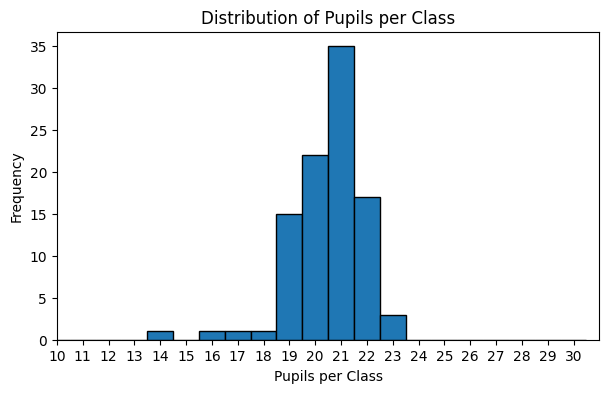

In [ ]:
#Making a histogram to visualise pupils per class (average on Department level)
plt.figure(figsize=(7, 4))
# Set bins to cover each integer from 10 to 30 (inclusive)
plt.hist(df_complete['Pupils per class (Department Level)'], bins=range(4, 32), edgecolor='black', align='left')
plt.title('Distribution of Pupils per Class')
plt.xlabel('Pupils per Class')
plt.ylabel('Frequency')
plt.xticks(range(10, 31)) # Ensure x-axis ticks align with the bins
plt.xlim(10, 31) # Set x-axis range from 10 to 31 to include the last bin edge
plt.show()

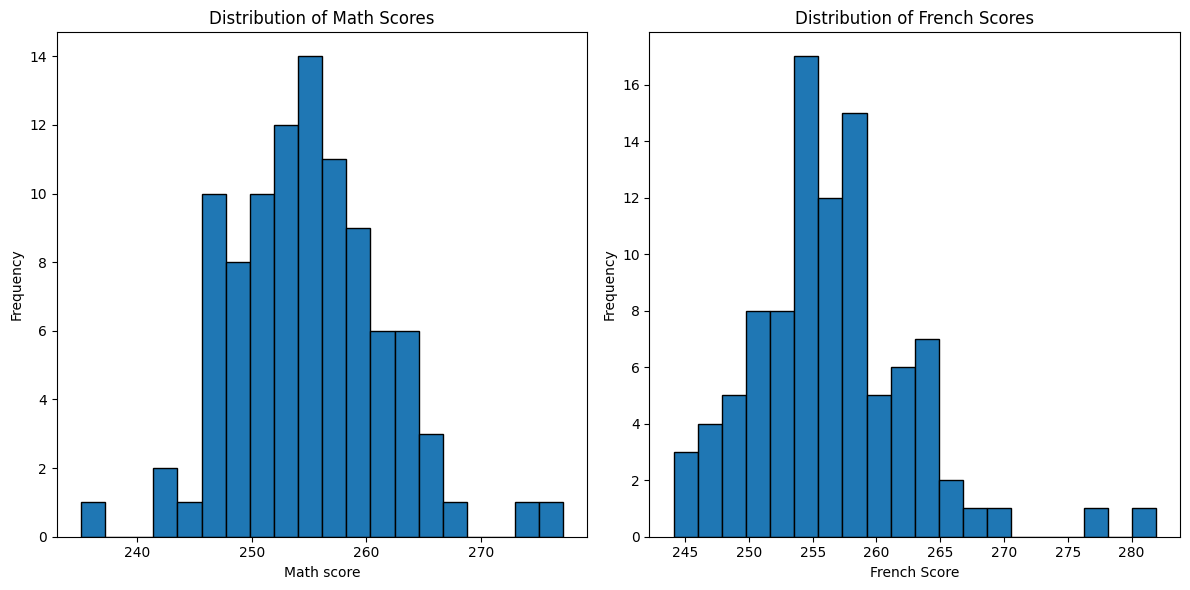

In [ ]:
# Create histograms for math and French performance scores, as subplots (to be able to see both of them at once)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(df_complete['score_math'], bins=20, edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(df_complete['score_french'], bins=20, edgecolor='black')
plt.title('Distribution of French Scores')
plt.xlabel('French Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

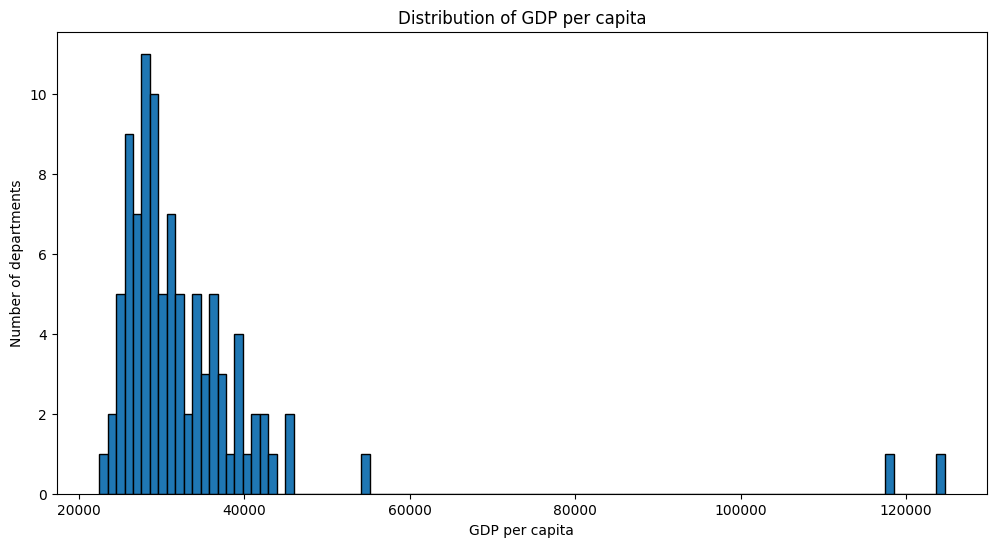

In [ ]:
# Visualising GDP data as histogram
plt.figure(figsize=(12, 6))
plt.hist(df_complete['GDP per capita'], bins=100, edgecolor='black')
plt.title('Distribution of GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Number of departments')
plt.show()

In [ ]:
#Our complete dataset
df_complete.head()

,Code département,Pupils per class (Department Level),score_math,score_french,Départment,GDP per capita,Population
0,01,23.316057,259.6,261.2,Ain,28296,671289
1,02,19.583434,242.3,244.3,Aisne,25556,525558
2,03,19.501536,249.0,252.3,Allier,27657,334715
3,04,19.895954,250.7,255.3,Alpes de Haute-Provence,28149,167179
4,05,19.529310,265.1,261.8,Hautes-Alpes,28672,141677


In [ ]:
#Finding the outliers in regard to GDP per capita
gdp_above_100k = df_complete[df_complete['GDP per capita'] > 100000]
print("Departments with GDP per capita above 100,000:")
for index, row in gdp_above_100k.iterrows():
    print(row['Code département'])

Departments with GDP per capita above 100,000:
75
92


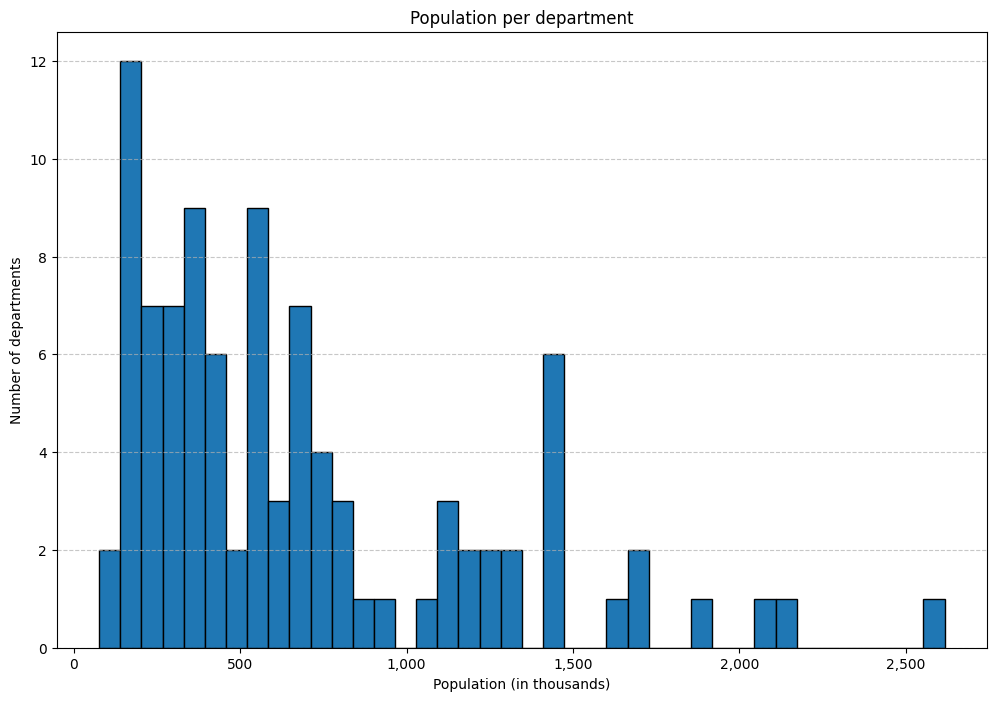

In [ ]:
# Visualising Population data (vertical histogram with population in thousands)
plt.figure(figsize=(12, 8))

# Create the vertical histogram
# We will handle the thousands conversion for display on the axis itself
plt.hist(df_complete['Population'], bins=40, edgecolor='black')

plt.title('Population per department')
plt.ylabel('Number of departments')
plt.xlabel('Population (in thousands)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Get min and max population values
min_pop = df_complete['Population'].min()
max_pop = df_complete['Population'].max()

# Format x-axis ticks to show values in thousands
def thousands_formatter(x, pos):
    return f'{x/1000:,.0f}'

formatter = mticker.FuncFormatter(thousands_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
#Finding the outliers in regard to population
population_above_2_5_million = df_complete[df_complete['Population'] > 2500000]
print("Departments with population above 2.5 million:")
for index, row in population_above_2_5_million.iterrows():
    print(row['Départment'])

Departments with population above 2.5 million:
Nord


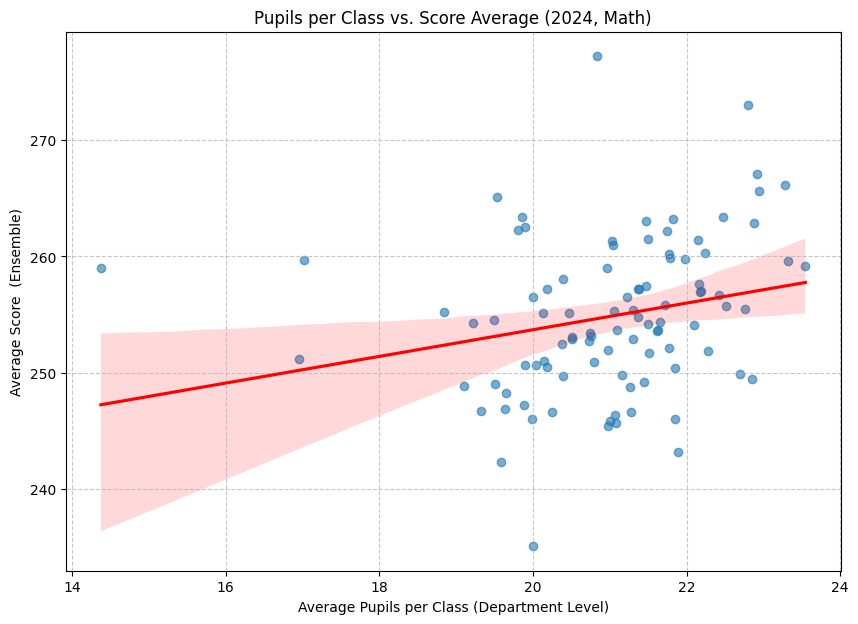

In [ ]:
# Create scatterplot with trendline for score_moyen (average performance, for Math) and pupils per class
plt.figure(figsize=(10, 7))
sns.regplot(
    x='Pupils per class (Department Level)',
    y='score_math',
    data=df_complete,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('Pupils per Class vs. Score Average (2024, Math)')
plt.xlabel('Average Pupils per Class (Department Level)')
plt.ylabel('Average Score  (Ensemble)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

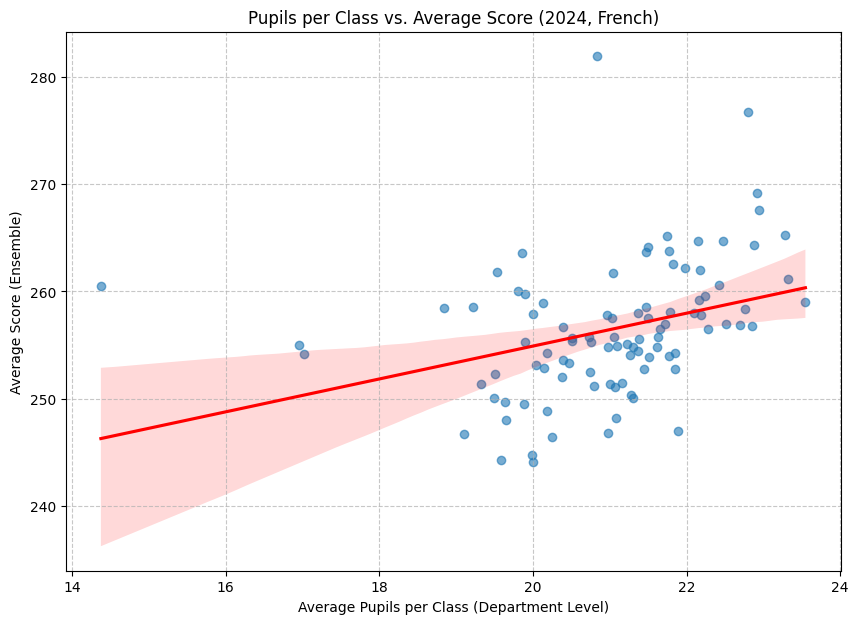

In [ ]:
# Create scatterplot with trendline for score moyen (average score, in French) and pupils per class
plt.figure(figsize=(10, 7))
sns.regplot(
    x='Pupils per class (Department Level)',
    y='score_french',
    data=df_complete,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)

plt.title('Pupils per Class vs. Average Score (2024, French)')
plt.xlabel('Average Pupils per Class (Department Level)')
plt.ylabel('Average Score (Ensemble)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Calculating Pearson Correlation Coefficient for Math Score - Pupils per Class
# Extract the relevant columns
x = df_complete['Pupils per class (Department Level)']
y = df_complete['score_math']

# Calculate Pearson correlation coefficient (R)
r_value, _ = pearsonr(x, y)

# Calculate the coefficient of determination (R)
r_squared = r_value**2

# Print the results
print(f"Pearson Correlation Coefficient (R): {r_value:.4f}")
print(f"Coefficient of Determination (R): {r_squared:.4f}")

Pearson Correlation Coefficient (R): 0.2399
Coefficient of Determination (R): 0.0576


In [ ]:
#Calculating Pearson Correlation Coefficient for French Score - Pupils per Class
# Extract the relevant columns
x = df_complete['Pupils per class (Department Level)']
y = df_complete['score_french']

# Calculate Pearson correlation coefficient (R)
r_value, _ = pearsonr(x, y)

# Calculate the coefficient of determination (R)
r_squared = r_value**2

# Print the results
print(f"Pearson Correlation Coefficient (R): {r_value:.4f}")
print(f"Coefficient of Determination (R): {r_squared:.4f}")

Pearson Correlation Coefficient (R): 0.3410
Coefficient of Determination (R): 0.1163


In [ ]:
# Merge df_merged_score_pupils_math2024 and df_frenchstudent on 'Code département'
df_correlation = pd.merge(
    df_complete[['Code département', 'score_french']],
    df_complete[['Code département', 'score_math']],
    on='Code département',
    how='inner'
)

In [ ]:
#Calculating Pearson Correlation Coefficient between Math Score and French Score (to see how similar the results of both disciplines are)
# Extract the relevant columns for correlation
x = df_correlation['score_math']
y = df_correlation['score_french']

# Calculate Pearson correlation coefficient (R)
r_value, _ = pearsonr(x, y)

# Calculate the coefficient of determination (R^2)
r_squared = r_value**2

# Print the results
print(f"Pearson Correlation Coefficient (R) between Math and French scores: {r_value:.4f}")
print(f"Coefficient of Determination (R^2) between Math and French scores: {r_squared:.4f}")

Pearson Correlation Coefficient (R) between Math and French scores: 0.9168
Coefficient of Determination (R^2) between Math and French scores: 0.8405


#Explain the results of the corr

<Axes: >

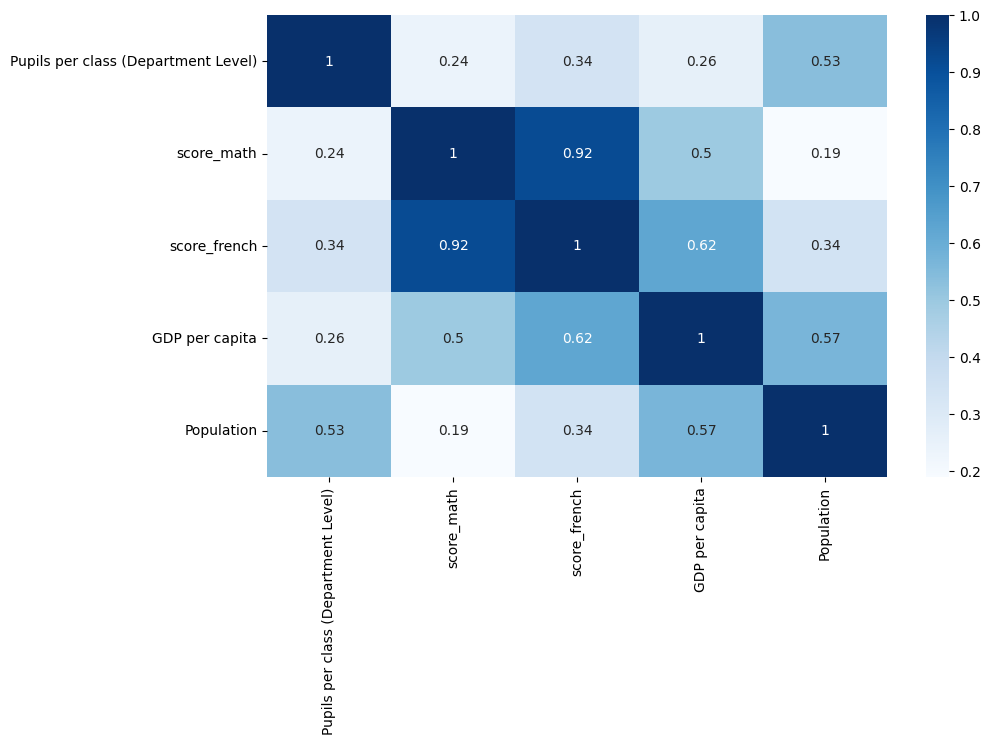

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_complete.corr(numeric_only=True), annot=True, cmap='Blues')

#Explanations of the visualised results

The histogram generally shows normal distributions of pupils per teacher, math, and french. Both GDP per capita and population is a right skewed distribution meaning that a lot of departments have similar levels of GDP per capita and population, but with a few outliers such as Île-de-France and Hauts-de-Seine in GDP per capita and Nord in population.

The scatterplots generally shows a positive trend between the number of pupils per teacher and performance in both math and french. This is counter-intuitive to our arguement, but will be addressed later with the regression and controls of confounding factors.

The pearson's R between numbers of pupils per teacher and math is 0,27 meaning that there is a weak (close to moderate) correlation between the two variables. The pearson's R between numbers of pupils per teacher and French is 0,37 meaning that there is a moderate correlation between the two variables.

The heatmap plots the rest of the correlations in the dataset. From the heatmap, the most noticeable is the fact that GDP per capita is strongly correlated with both math and French and almost moderately correlated to class size. Last, population is strongly correlated with pupils per teacher and weak to moderately correlated to math and French performance. These two variables are therefore very relevant confounding factor.


# **Data Analysis**

#Linear regression (without control variables)

**French Performance**

In [ ]:
linear_regression = LinearRegression()

In [ ]:
#Storing our linear regression in "reg"
reg = linear_regression.fit(df_complete[['Pupils per class (Department Level)']], df_complete[['score_french']])

In [ ]:
#Slope for French performance
reg.coef_

array([[1.53032609]])

In [ ]:
#Intercept for French performance
reg.intercept_

array([224.31196117])

###Explanation:
The above results mean that from the intercept at zero pupils per teacher the performance in French goes up by 1,53 per extra pupil in the class starting at 224 (zero pupils).

**Math performance**

In [ ]:
#Storing our linear regression in "reg2"
reg2 = linear_regression.fit(df_complete[['Pupils per class (Department Level)']], df_complete[['score_math']])

In [ ]:
#Slope for math performance
reg2.coef_

array([[1.14538411]])

In [ ]:
#Intercept for math performance
reg2.intercept_

array([230.79108324])

###Explanation:
The above results mean that from the intercept at zero pupils per teacher the performance in math goes up by 1,15 per extra pupil in the class starting at 231 (zero pupils).

#French performance

In [ ]:
# Making the linear regression for relationship between pupils per teacher and French performance

# Defining the independent variable (X) and add a constant for the intercept
X = df_complete[['Pupils per class (Department Level)']]
X = sm.add_constant(X)

# Defining the dependent variable (Y)
Y = df_complete['score_french']

# Create and fit the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary to see all statistics, including p-values
print(results.summary())

# Extract and print the p-value for 'Pupils per class (Department Level)'
p_value_coef = results.pvalues['Pupils per class (Department Level)']
print(f"\nP-value for the coefficient of 'Pupils per class (Department Level)': {p_value_coef:.4f}")

                            OLS Regression Results                            
Dep. Variable:           score_french   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.37
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           0.000675
Time:                        12:31:25   Log-Likelihood:                -306.14
No. Observations:                  96   AIC:                             616.3
Df Residuals:                      94   BIC:                             621.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

###Explanation of the obtained P-value
The P-value at 0,001 indicates a strongly significant relationship (***) between number of pupils per teacher and math performance. The confidence interval from 0,67 to 2,40 indicates that true effect is within this range and there statistically different from 0. This result is however without any control variables and cannot be interpreted as causal.

#Math performance

In [ ]:
#Make a comprehensive statistical analysis: linear regression for relationship between pupils per teacher and Math performance

# Define the independent variable (X) and add a constant for the intercept
X2 = df_complete[['Pupils per class (Department Level)']]
X2 = sm.add_constant(X2)

# Define the dependent variable (y)
Y2 = df_complete['score_math']

# Create and fit the OLS model
model = sm.OLS(Y2, X2)
results = model.fit()

# Print the summary to see all statistics, including p-values
print(results.summary())

# Extract and print the p-value for 'Pupils per class (Department Level)'
p_value_coef = results.pvalues['Pupils per class (Department Level)']
print(f"\nP-value for the coefficient of 'Pupils per class (Department Level)': {p_value_coef:.4f}")

                            OLS Regression Results                            
Dep. Variable:             score_math   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.742
Date:                Fri, 19 Dec 2025   Prob (F-statistic):             0.0185
Time:                        12:31:25   Log-Likelihood:                -315.14
No. Observations:                  96   AIC:                             634.3
Df Residuals:                      94   BIC:                             639.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

###Explanation of the obtained P-value
The P-value at 0,019 and range of plausible values for the confidence interval all being above 0 indicates a significant relationship (*) between number of pupils per teacher and math performance. This result is however without any control variables and cannot be interpreted as causal.

# Multiple linear regression (with control variables)

**French** **Performance**

In [ ]:
#Making the multiple linear regression for French performance, pupils per class, GDP/capita and population

# Define the independent variables (X) and add a constant for the intercept
X_french_multi = df_complete[['Pupils per class (Department Level)', 'GDP per capita', 'Population']]
X_french_multi = sm.add_constant(X_french_multi)

# Define the dependent variable (y)
Y_french_multi = df_complete['score_french']

# Create and fit the OLS model
model_french_multi = sm.OLS(Y_french_multi, X_french_multi)
results_french_multi = model_french_multi.fit()

# Print the summary to see all statistics, including p-values
print(results_french_multi.summary())

                            OLS Regression Results                            
Dep. Variable:           score_french   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     23.87
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           1.63e-11
Time:                        12:31:25   Log-Likelihood:                -284.44
No. Observations:                  96   AIC:                             576.9
Df Residuals:                      92   BIC:                             587.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Math performance**

In [ ]:
#Making the multiple linear regression for Math performance, pupils per class, GDP/capita and population

X_math_multi = df_complete[['Pupils per class (Department Level)', 'GDP per capita', 'Population']]
X_math_multi = sm.add_constant(X_math_multi)

# Define the dependent variable (y)
Y_math_multi = df_complete['score_math']

# Create and fit the OLS model
model_math_multi = sm.OLS(Y_math_multi, X_math_multi)
results_math_multi = model_math_multi.fit()

# Print the summary to see all statistics, including p-values
print(results_math_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             score_math   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     12.82
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           4.50e-07
Time:                        12:33:32   Log-Likelihood:                -301.22
No. Observations:                  96   AIC:                             610.4
Df Residuals:                      92   BIC:                             620.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co